<a href="https://colab.research.google.com/github/lilah-duboff/lilah_duboff_miniproj9/blob/main/Mini9_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Introduction


In this project, we will be exploring and analyzing a free Kaggle dataset the contains information about the average hourly wages for different levels of education, over a span of 50 years (1973-2022). The data is then further broken down by sex and race, allowing for demographics comparison of average pay by education level. The analyses provided compare the average hourly wage based on education level, for 2022 and 1973 (the limits of the dataset), and continue to show the differences in average hourly wages between all men and women who have earned a bachelors or advanced degree.


# Load Data


To begin, we import our dependencies, and use pandas to load the url into a dataframe. We ensure that it succeeded by running a few assert statements. Next, we check to see our column names, and if there are any null or missing numbers in the data.

In [14]:
data = pd.read_csv('https://raw.githubusercontent.com/lilah-duboff/data-for-URLS/refs/heads/main/wages_by_education.csv')

assert data is not None
assert data.shape == (50, 61)




By running data.head() and data.tail(), we are able to see the first and last five rows of the dataframe. We confirm that the first year is 1973, and the last (most recent year) is 2022.



In [15]:
data.head()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


In [13]:
data.tail()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
45,1977,17.59,21.50,22.97,31.07,37.36,20.43,25.97,26.70,36.09,...,12.80,16.30,18.87,25.83,37.10,12.66,17.22,17.12,21.49,30.31
46,1976,17.52,21.76,23.49,31.46,37.50,20.36,26.14,27.10,36.42,...,12.75,16.40,19.11,26.10,34.92,13.79,17.29,17.40,20.29,20.93
47,1975,17.30,21.55,23.30,31.45,38.41,20.00,26.02,26.93,36.21,...,12.48,15.88,18.11,27.93,33.03,12.87,16.04,17.04,18.85,23.63
48,1974,17.68,21.60,23.32,31.69,38.37,20.63,26.15,26.79,36.62,...,12.31,15.55,18.19,27.80,33.86,13.24,16.29,18.17,21.70,26.74
49,1973,18.06,22.22,24.08,32.80,38.16,21.18,26.90,27.67,37.69,...,12.02,15.79,18.11,28.35,41.81,12.92,16.46,20.22,22.23,25.10


Next, we want to see what our column titles are. Here, we fortunately have descriptive column names, so there is no need to reference the code book. We are able to see that the dataframe contains information about: wages by education level, wages by education level and sex, and wages by education level, sex, and race.

In [8]:
print(data.columns)

Index(['year', 'less_than_hs', 'high_school', 'some_college',
       'bachelors_degree', 'advanced_degree', 'men_less_than_hs',
       'men_high_school', 'men_some_college', 'men_bachelors_degree',
       'men_advanced_degree', 'women_less_than_hs', 'women_high_school',
       'women_some_college', 'women_bachelors_degree', 'women_advanced_degree',
       'white_less_than_hs', 'white_high_school', 'white_some_college',
       'white_bachelors_degree', 'white_advanced_degree', 'black_less_than_hs',
       'black_high_school', 'black_some_college', 'black_bachelors_degree',
       'black_advanced_degree', 'hispanic_less_than_hs',
       'hispanic_high_school', 'hispanic_some_college',
       'hispanic_bachelors_degree', 'hispanic_advanced_degree',
       'white_men_less_than_hs', 'white_men_high_school',
       'white_men_some_college', 'white_men_bachelors_degree',
       'white_men_advanced_degree', 'black_men_less_than_hs',
       'black_men_high_school', 'black_men_some_college',
   

Finally, we check to see if there are any null or missing values in the data, and check out the number of rows and columns. We found that there were no null or missing values, and the dataframe contains 50 rows (for 50 years), and 61 columns.

In [5]:
data.isnull().values.any()

False

In [10]:
data.shape

(50, 61)

# Data Cleaning and Exploration


We established that there are no missing values in this dataset, so we will move on to data exploration. The purpose of this data exploration is to generate summary statistics, and set some initial variables that we will use to create our plots in the analysis section of this notebook


In [16]:
data.describe()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,1997.50000,15.702600,20.876600,23.219200,34.768600,43.899000,17.565200,23.832600,26.333800,39.988400,...,12.77180,16.461400,18.960400,27.924400,36.186200,12.808200,16.597600,18.963600,26.487400,34.75360
std,14.57738,1.125252,0.742743,0.776425,3.306645,5.305794,1.638445,1.225697,0.897943,3.734945,...,0.46448,0.700854,0.733991,2.417531,3.123264,0.752798,0.685984,0.954833,3.219796,5.20913
min,1973.00000,13.950000,19.620000,22.040000,30.040000,35.320000,15.390000,22.110000,24.780000,35.160000,...,11.77000,15.530000,17.710000,23.540000,29.340000,11.350000,15.530000,17.040000,18.850000,20.93000
25%,1985.25000,14.885000,20.392500,22.545000,31.875000,38.757500,16.250000,22.945000,25.800000,36.605000,...,12.45000,15.862500,18.412500,25.985000,33.870000,12.275000,16.115000,18.292500,24.237500,30.95500
50%,1997.50000,15.340000,20.855000,23.185000,34.205000,44.085000,16.905000,23.695000,26.365000,39.485000,...,12.78000,16.300000,18.790000,28.515000,37.160000,12.725000,16.465000,18.930000,27.390000,36.08500
75%,2009.75000,16.497500,21.480000,23.697500,37.122500,47.557500,18.610000,24.307500,27.012500,42.340000,...,13.02750,16.992500,19.580000,30.110000,38.312500,13.075000,16.982500,19.645000,28.702500,38.37000
max,2022.00000,18.060000,22.700000,25.440000,41.650000,53.740000,21.180000,26.900000,28.550000,49.010000,...,13.89000,18.300000,20.450000,31.380000,42.440000,14.970000,18.500000,21.140000,31.550000,44.15000


In [59]:
less_than_hs = np.mean(data["less_than_hs"])
hs = np.mean(data["high_school"])
some_college = np.mean(data["some_college"])
bachelors = np.mean(data["bachelors_degree"])
advanced_degree = np.mean(data["advanced_degree"])

In [58]:
men_with_bach = np.mean(data["men_bachelors_degree"])
women_with_bach = np.mean(data["women_bachelors_degree"])

men_with_adv = np.mean(data["men_advanced_degree"])
women_with_adv = np.mean(data["women_advanced_degree"])

# Data Analysis

Now, we move on to the data analysis section. Here, we are attempting to visualize the differences in wages between different levels of education, sex, and race. A deeper written analysis will be provided underneath each individual plot.

--

The first two line plots show how the mean wages changed over time for men and women of different education levels.

The second two plots compare the average wages for different education levels, by year. Each bar in these plots represents a different level of education - the first plot depicts data from 2022, and the second plot depicts data from 1973.

The third two plots compare the average wage for men and women who hold either bachelors degrees or advanced degrees.

The last two plots show the differences in average hourly wage between white, black, and hispanic people who hold bachelors or advanced degrees

--

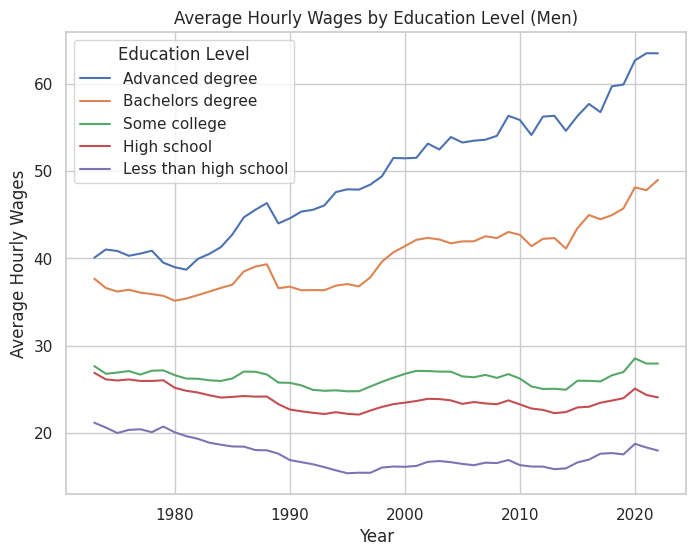

In [60]:
men_data = {
    'Year': data["year"],
    'Advanced degree': data["men_advanced_degree"],
    'Bachelors degree': data["men_bachelors_degree"],
    'Some college': data["men_some_college"],
    'High school': data["men_high_school"],
    'Less than high school': data["men_less_than_hs"]
}

df = pd.DataFrame(men_data)

df_long = pd.melt(df, id_vars=['Year'],
                  value_vars=['Advanced degree', 'Bachelors degree', 'Some college', 'High school', 'Less than high school'],
                  var_name='Education_Level', value_name='Wages')

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.lineplot(data=df_long, x='Year', y='Wages', hue='Education_Level', legend="full")
plt.title("Average Hourly Wages by Education Level (Men)")
plt.xlabel("Year")
plt.ylabel("Average Hourly Wages")
plt.legend(title='Education Level')

plt.show()

This plot depicts the average hourly wages separated by education level for men in the US. Men who hold advanced degrees earn the highest hourly wage among all education levels, and men who did not complete high school earn the least hourly wage. In around 1980, pay began to steadily increase over time for people who held either a bachelors or a masters degree, while the average pay for those with some college experience or less remained around the same amount.

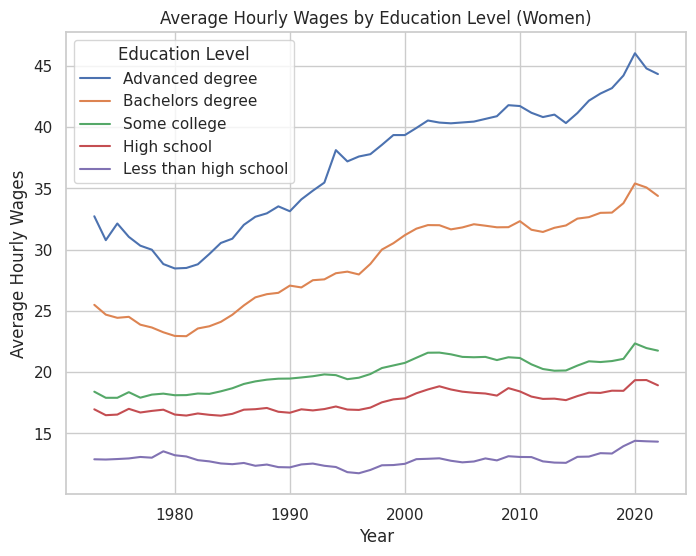

In [61]:
women_data = {
    'Year': data["year"],
    'Advanced degree': data["women_advanced_degree"],
    'Bachelors degree': data["women_bachelors_degree"],
    'Some college': data["women_some_college"],
    'High school': data["women_high_school"],
    'Less than high school': data["women_less_than_hs"]
}

df = pd.DataFrame(women_data)

df_long = pd.melt(df, id_vars=['Year'],
                  value_vars=['Advanced degree', 'Bachelors degree', 'Some college', 'High school', 'Less than high school'],
                  var_name='Education_Level', value_name='Wages')

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.lineplot(data=df_long, x='Year', y='Wages', hue='Education_Level', legend="full")
plt.title("Average Hourly Wages by Education Level (Women)")
plt.xlabel("Year")
plt.ylabel("Average Hourly Wages")
plt.legend(title='Education Level')

plt.show()

This plot depicts the average hourly wages separated by education level for women in the US. Similar to the men's plot, women who hold advanced degrees earn the highest hourly wage among all education levels, and women who did not complete high school earn the least hourly wage. Compared to the mens' plot however, the range of specific pay values appears to be less for women - men who hold advanced degrees earned over 60/hr in 2022, while women with equivalent degrees earned just over 45/hr.

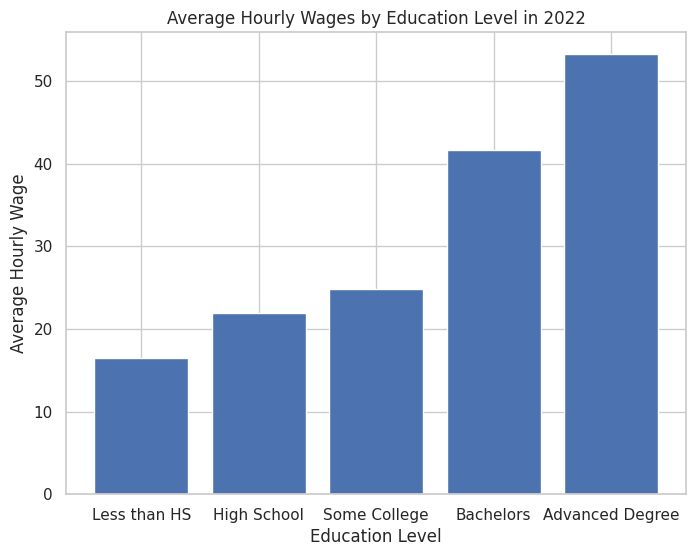

In [62]:
education_levels = ['Less than HS', 'High School', 'Some College', 'Bachelors', 'Advanced Degree']
average_wages = data.iloc[0, 1:6]

plt.figure(figsize=(8, 6))
plt.bar(education_levels, average_wages)
plt.title("Average Hourly Wages by Education Level in 2022")
plt.xlabel("Education Level")
plt.ylabel("Average Hourly Wage")
plt.show()

This plot shows the average wage for each education level just for the year 2022 - we would expect to see that as education level increases, as does the average hourly wage, and that's what the graph depicts. There does seem to be a stark jump between Some College to Bachelors and then to Advanced Degrees earners.

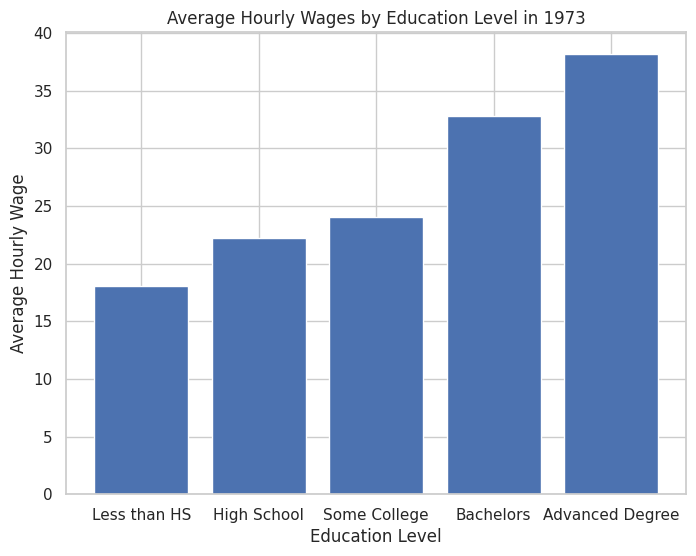

In [63]:
education_levels = ['Less than HS', 'High School', 'Some College', 'Bachelors', 'Advanced Degree']
average_wages = data.iloc[49, 1:6]

plt.figure(figsize=(8, 6))
plt.bar(education_levels, average_wages)
plt.title("Average Hourly Wages by Education Level in 1973")
plt.xlabel("Education Level")
plt.ylabel("Average Hourly Wage")
plt.show()

Like the above plot, this graph shows the average wage for each education level just for the year 1973. Similarly, we see that as the education level increases, so does the average hourly wage. In 1973, there is less of a dramatic jump between Some College and Bachelors to Advanced degree holders. The skew is pretty steady as it increases.

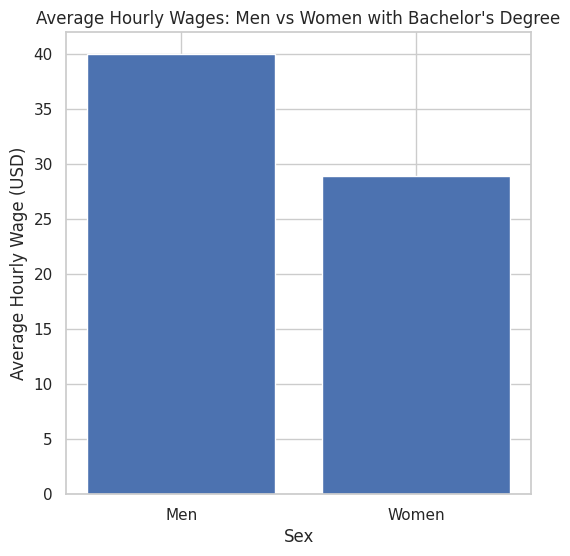

In [74]:
plt.figure(figsize=(6, 6))
plt.bar(['Men', 'Women'], [men_with_bach, women_with_bach])
plt.title("Average Hourly Wages: Men vs Women with Bachelor's Degree")
plt.xlabel("Sex")
plt.ylabel("Average Hourly Wage (USD)")
plt.show()

This plot depicts the wage gap between men and women who hold bachelors degrees - men with bachelors degrees earn approximately 40/hr, while women with equivalent degrees earn approximately 28/hr. This accounts for men and women of all races.

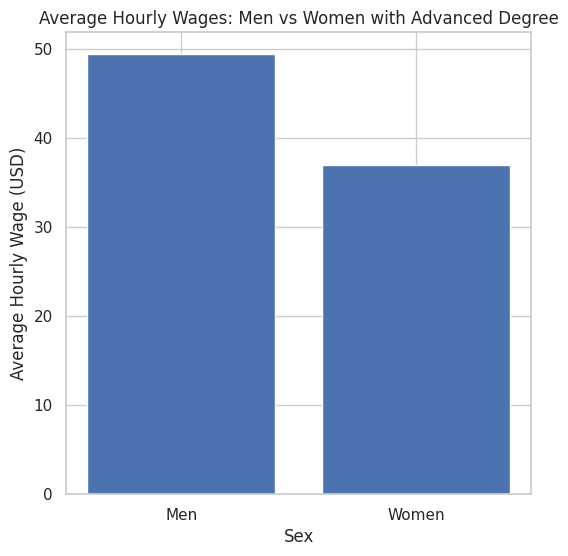

In [75]:
plt.figure(figsize=(6, 6))
plt.bar(['Men', 'Women'], [men_with_adv, women_with_adv])
plt.title("Average Hourly Wages: Men vs Women with Advanced Degree")
plt.xlabel("Sex")
plt.ylabel("Average Hourly Wage (USD)")
plt.show()

This plot depicts the wage gap between men and women who hold advanced degrees degrees - men with advanced degrees earn nearly 50/hr, while women with equivalent degrees earn approximately 37/hr. This accounts for men and women of all races.

Now, we'll do a comparison of wages by education level, sex, and race

In [71]:
white_bachelors = np.mean(data["white_bachelors_degree"])
black_bachelors = np.mean(data["black_bachelors_degree"])
hispanic_bachelors = np.mean(data["hispanic_bachelors_degree"])

white_advanced = np.mean(data["white_advanced_degree"])
black_advanced = np.mean(data["black_advanced_degree"])
hispanic_advanced = np.mean(data["hispanic_advanced_degree"])

print(white_bachelors, black_bachelors, hispanic_bachelors)
print(white_advanced, black_advanced, hispanic_advanced)

35.651399999999995 29.571199999999997 30.403399999999998
44.34659999999999 38.303399999999996 39.8904


|   Degree   |   Race    | Avg Hourly Wage |
|------------|-----------|-----------------|
|  Bachelors |   White   |      35.65      |
|  Bachelors |   Black   |      29.57      |
|  Bachelors |  Hispanic |      30.40      |
|  Advanced  |   White   |      44.35      |
|  Advanced  |   Black   |      38.30      |
|  Advanced  |  Hispanic |      39.89      |

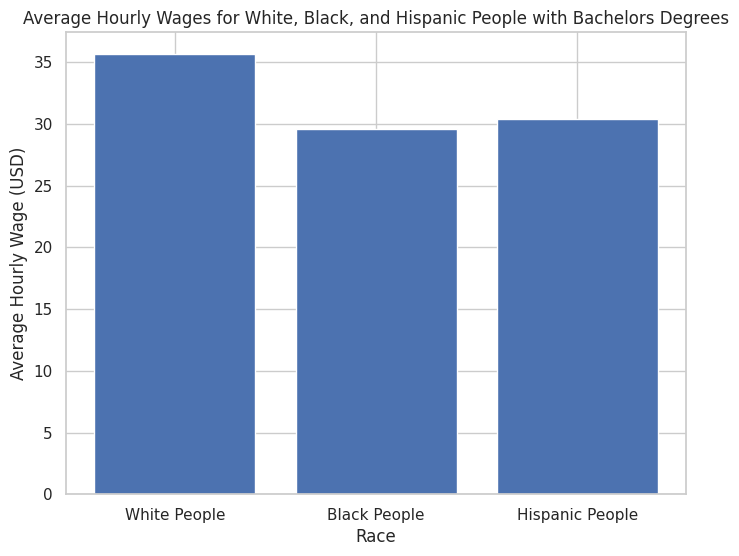

In [72]:
plt.figure(figsize=(8, 6))
plt.bar(['White People', 'Black People', 'Hispanic People'], [white_bachelors, black_bachelors, hispanic_bachelors])
plt.title("Average Hourly Wages for White, Black, and Hispanic People with Bachelors Degrees")
plt.xlabel("Race")
plt.ylabel("Average Hourly Wage (USD)")
plt.show()

This plot shows a comparison of hourly wage by race, for people who earned a bachelors degree. From looking at the bars, we can see that white people earned the highest and black people the least, on average.

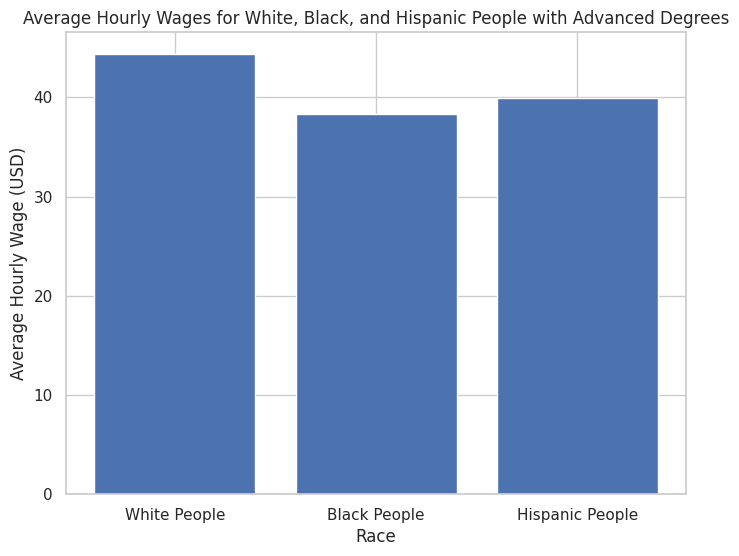

In [73]:
plt.figure(figsize=(8, 6))
plt.bar(['White People', 'Black People', 'Hispanic People'], [white_advanced, black_advanced, hispanic_advanced])
plt.title("Average Hourly Wages for White, Black, and Hispanic People with Advanced Degrees")
plt.xlabel("Race")
plt.ylabel("Average Hourly Wage (USD)")
plt.show()

This plot shows a comparison of hourly wage by race, for people who earned an advanced degree. From looking at the bars, we can see that white people earned the highest and black people the least, on average.